In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [136]:
shampoo_df = pd.read_csv('shampoo_sales.csv')
print("Shampoo Sales Data:")
print(shampoo_df.head())

Shampoo Sales Data:
  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3


In [137]:
print(shampoo_df.tail())

   Month  Sales
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9


In [138]:
print(shampoo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes
None


In [139]:
print("\nShampoo Sales Statistics:")
print(shampoo_df.describe())


Shampoo Sales Statistics:
            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000


In [140]:
print(shampoo_df.shape)

(36, 2)


In [141]:
print(shampoo_df.isnull().sum())

Month    0
Sales    0
dtype: int64


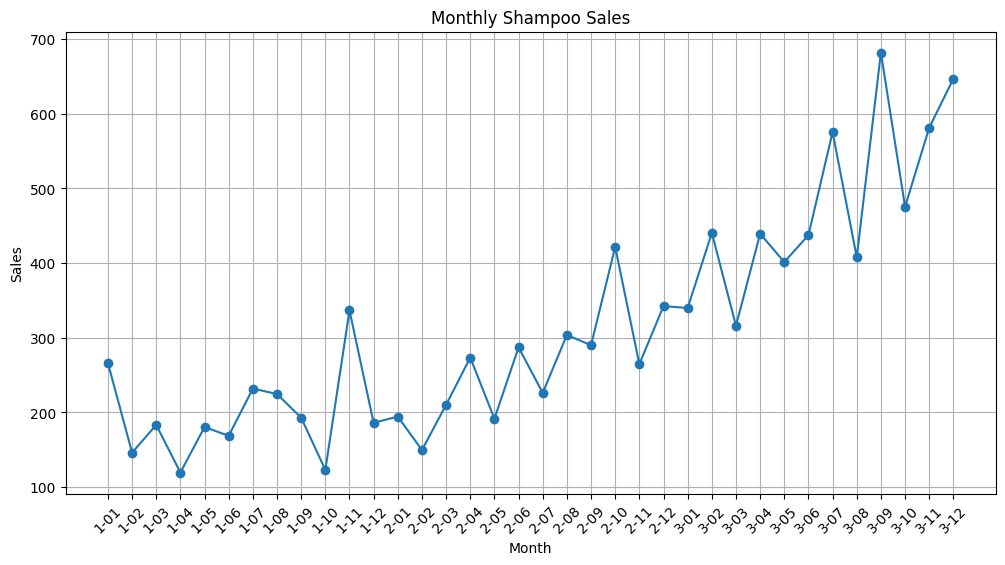

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(shampoo_df['Month'], shampoo_df['Sales'], marker='o')
plt.title('Monthly Shampoo Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [143]:
print(f"Original columns: {shampoo_df.columns.tolist()}")
shampoo_df.columns = shampoo_df.columns.str.strip()  # Remove any leading/trailing whitespace

if 'Month' not in shampoo_df.columns or 'Sales' not in shampoo_df.columns:
    raise KeyError("The required columns 'Month' or 'Sales' are missing!")

shampoo_df['Month'] = shampoo_df['Month'].str.replace('"', '', regex=False).str.strip()

shampoo_df['Month'] = pd.to_datetime(shampoo_df['Month'], format='%m-%y')




Original columns: ['Month', 'Sales']


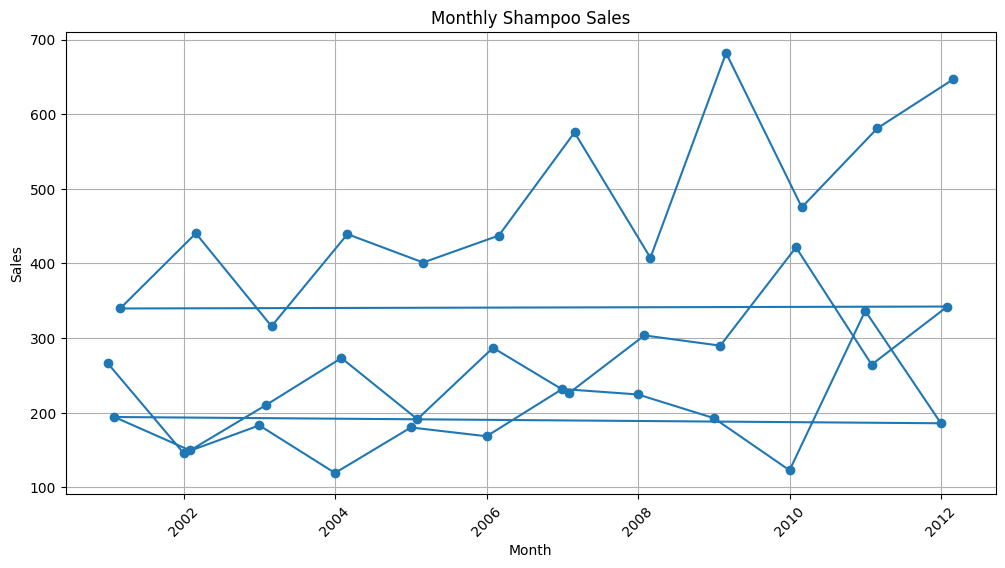

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(shampoo_df['Month'], shampoo_df['Sales'], marker='o')
plt.title('Monthly Shampoo Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [150]:
shampoo_df['Year'] = shampoo_df['Month'].dt.year
shampoo_df['Month_Num'] = shampoo_df['Month'].dt.month
shampoo_df

,Month,Sales,Year,Month_Num,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_6,Expanding_Mean
0,2001-01-01,266.0,2001,1,NaN,NaN,NaN,NaN,NaN,266.000000
1,2002-01-01,145.9,2002,1,266.0,NaN,NaN,NaN,NaN,205.950000
2,2003-01-01,183.1,2003,1,145.9,266.0,NaN,198.333333,NaN,198.333333
3,2004-01-01,119.3,2004,1,183.1,145.9,266.0,149.433333,NaN,178.575000
4,2005-01-01,180.3,2005,1,119.3,183.1,145.9,160.900000,NaN,178.920000
5,2006-01-01,168.5,2006,1,180.3,119.3,183.1,156.033333,177.183333,177.183333
6,2007-01-01,231.8,2007,1,168.5,180.3,119.3,193.533333,171.483333,184.985714
7,2008-01-01,224.5,2008,1,231.8,168.5,180.3,208.266667,184.583333,189.925000
8,2009-01-01,192.8,2009,1,224.5,231.8,168.5,216.366667,186.200000,190.244444
9,2010-01-01,122.9,2010,1,192.8,224.5,231.8,180.066667,186.800000,183.510000


In [151]:
shampoo_df['Lag_1'] = shampoo_df['Sales'].shift(1)
shampoo_df['Lag_7'] = shampoo_df['Sales'].shift(7)
shampoo_df

,Month,Sales,Year,Month_Num,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_6,Expanding_Mean,Lag_7
0,2001-01-01,266.0,2001,1,NaN,NaN,NaN,NaN,NaN,266.000000,NaN
1,2002-01-01,145.9,2002,1,266.0,NaN,NaN,NaN,NaN,205.950000,NaN
2,2003-01-01,183.1,2003,1,145.9,266.0,NaN,198.333333,NaN,198.333333,NaN
3,2004-01-01,119.3,2004,1,183.1,145.9,266.0,149.433333,NaN,178.575000,NaN
4,2005-01-01,180.3,2005,1,119.3,183.1,145.9,160.900000,NaN,178.920000,NaN
5,2006-01-01,168.5,2006,1,180.3,119.3,183.1,156.033333,177.183333,177.183333,NaN
6,2007-01-01,231.8,2007,1,168.5,180.3,119.3,193.533333,171.483333,184.985714,NaN
7,2008-01-01,224.5,2008,1,231.8,168.5,180.3,208.266667,184.583333,189.925000,266.0
8,2009-01-01,192.8,2009,1,224.5,231.8,168.5,216.366667,186.200000,190.244444,145.9
9,2010-01-01,122.9,2010,1,192.8,224.5,231.8,180.066667,186.800000,183.510000,183.1


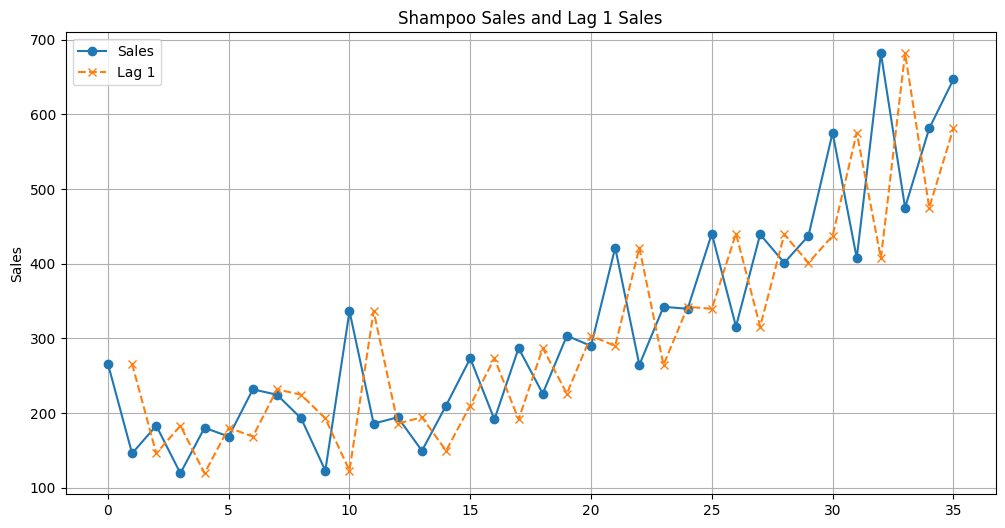

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(shampoo_df.index, shampoo_df['Sales'], label='Sales', marker='o')
plt.plot(shampoo_df.index, shampoo_df['Lag_1'], label='Lag 1', linestyle='--', marker='x')
plt.title('Shampoo Sales and Lag 1 Sales')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [154]:
shampoo_df['Rolling_Mean_3'] = shampoo_df['Sales'].rolling(window=3).mean()
shampoo_df['Rolling_Mean_6'] = shampoo_df['Sales'].rolling(window=6).std()
shampoo_df

,Month,Sales,Year,Month_Num,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_6,Expanding_Mean,Lag_7
0,2001-01-01,266.0,2001,1,NaN,NaN,NaN,NaN,NaN,266.000000,NaN
1,2002-01-01,145.9,2002,1,266.0,NaN,NaN,NaN,NaN,205.950000,NaN
2,2003-01-01,183.1,2003,1,145.9,266.0,NaN,198.333333,NaN,198.333333,NaN
3,2004-01-01,119.3,2004,1,183.1,145.9,266.0,149.433333,NaN,178.575000,NaN
4,2005-01-01,180.3,2005,1,119.3,183.1,145.9,160.900000,NaN,178.920000,NaN
5,2006-01-01,168.5,2006,1,180.3,119.3,183.1,156.033333,49.674235,177.183333,NaN
6,2007-01-01,231.8,2007,1,168.5,180.3,119.3,193.533333,38.045468,184.985714,NaN
7,2008-01-01,224.5,2008,1,231.8,168.5,180.3,208.266667,40.899605,189.925000,266.0
8,2009-01-01,192.8,2009,1,224.5,231.8,168.5,216.366667,41.020775,190.244444,145.9
9,2010-01-01,122.9,2010,1,192.8,224.5,231.8,180.066667,39.856342,183.510000,183.1


In [155]:
shampoo_df['Expanding_Mean'] = shampoo_df['Sales'].expanding().mean()
shampoo_df

,Month,Sales,Year,Month_Num,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Rolling_Mean_6,Expanding_Mean,Lag_7
0,2001-01-01,266.0,2001,1,NaN,NaN,NaN,NaN,NaN,266.000000,NaN
1,2002-01-01,145.9,2002,1,266.0,NaN,NaN,NaN,NaN,205.950000,NaN
2,2003-01-01,183.1,2003,1,145.9,266.0,NaN,198.333333,NaN,198.333333,NaN
3,2004-01-01,119.3,2004,1,183.1,145.9,266.0,149.433333,NaN,178.575000,NaN
4,2005-01-01,180.3,2005,1,119.3,183.1,145.9,160.900000,NaN,178.920000,NaN
5,2006-01-01,168.5,2006,1,180.3,119.3,183.1,156.033333,49.674235,177.183333,NaN
6,2007-01-01,231.8,2007,1,168.5,180.3,119.3,193.533333,38.045468,184.985714,NaN
7,2008-01-01,224.5,2008,1,231.8,168.5,180.3,208.266667,40.899605,189.925000,266.0
8,2009-01-01,192.8,2009,1,224.5,231.8,168.5,216.366667,41.020775,190.244444,145.9
9,2010-01-01,122.9,2010,1,192.8,224.5,231.8,180.066667,39.856342,183.510000,183.1


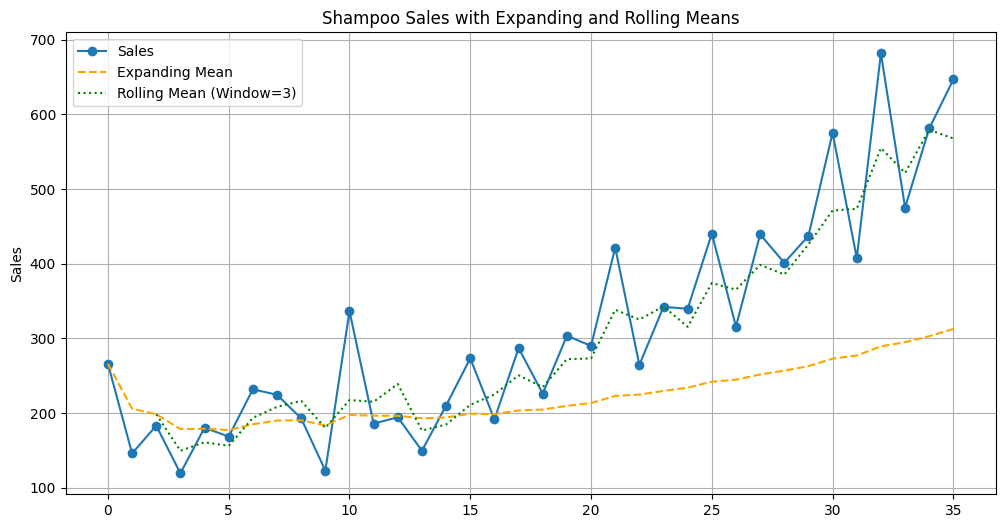

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(shampoo_df.index, shampoo_df['Sales'], label='Sales', marker='o')
plt.plot(shampoo_df.index, shampoo_df['Expanding_Mean'], label='Expanding Mean', linestyle='--', color='orange')
plt.plot(shampoo_df.index, shampoo_df['Rolling_Mean_3'], label='Rolling Mean (Window=3)', linestyle=':', color='green')
plt.title('Shampoo Sales with Expanding and Rolling Means')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()